<a href="https://colab.research.google.com/github/Avonna/Avona/blob/main/Evdokimova_Case_1_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#импортируем библиотеки
import matplotlib.pyplot as plt #matplotlib для визуализации
import numpy as np #numpy для работа с матрицами
import pandas as pd #для хранения истории обучения и ее визуализации
from sklearn.metrics import classification_report#отчет по классификации
from sklearn.metrics import confusion_matrix #матрица ошибок
from sklearn.datasets import load_digits #загрузчик датасетов
from sklearn.model_selection import train_test_split #авторазбиение
from tensorflow.keras.models import Sequential #последовательная модель (прямого распространения)
from tensorflow.keras.layers import Dense #полносвязный слой
from tensorflow.keras import optimizers #оптимизаторы
from tensorflow.keras.utils import to_categorical #преобразование в категориальные данные


#загружаем датасет с рукописными цифрами
digits = load_digits()

In [65]:
#изучим форматы хранения
print('Количество изображений и их ширина и высота: ', digits.images.shape) #1797 изображений размером 8x8
print('Количество объектов и признаков в данных: ', digits.data.shape) #1797 изображений с 64 признаками (признак - яркость каждого пикселя)
print('Количество меток: ', digits.target.shape) #1797 лейблов

Количество изображений и их ширина и высота:  (1797, 8, 8)
Количество объектов и признаков в данных:  (1797, 64)
Количество меток:  (1797,)


Text(0.5, 1.0, 'image label: 1')

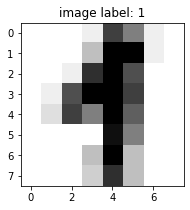

In [66]:
#выведем одно изображение для примера
sample_index = 90 #номер случайного изображения
plt.figure(figsize=(3, 3)) #размер фигуры для визуализации
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r, interpolation='nearest') #вывод изображения в ч/б формате
plt.title("image label: %d" % digits.target[sample_index]) #подпись изображения с классом картинки

In [67]:
#получим все данные и оставим только изображения 0 и 1
data = np.asarray(digits.data, dtype='float32') #преобразуем данные входа в массив numpy
target = np.asarray(digits.target, dtype='int32') #преобразуем данные выхода в массив numpy
data01 = data[target <=1] #входы для 0 и 1
target01 = target[target <=1] #выходы для 0 и 1

In [68]:
#изучим форматы хранения урезанного датасета
print('Количество объектов и признаков в данных: ', data01.shape) #360 изображений с 64 признаками (признак - яркость каждого пикселя)
print('Количество меток: ', target01.shape) #360 лейблов

Количество объектов и признаков в данных:  (360, 64)
Количество меток:  (360,)


In [69]:
#разобьем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(data01, target01, test_size=0.15, random_state=37) #15% на тест, неслучайная повторяемость по состоянию 37
print('Количество объектов и признаков в обучающих данных: ', X_train.shape) #306 изображений с 64 признаками (признак - яркость каждого пикселя)
print('Количество меток в обучающих данных: ', y_train.shape) #360 лейблов
print('Количество объектов и признаков в тестовых данных: ', X_test.shape) #360 изображений с 64 признаками (признак - яркость каждого пикселя)
print('Количество меток в тестовых данных: ', y_test.shape) #360 лейблов

Количество объектов и признаков в обучающих данных:  (306, 64)
Количество меток в обучающих данных:  (306,)
Количество объектов и признаков в тестовых данных:  (54, 64)
Количество меток в тестовых данных:  (54,)


In [70]:
#преобразуем с помощью one-hot encoding в категориальные данные выходные
Y_train = to_categorical(y_train) #создается матрица из K = число классов столбцов, в которой 1 стоит только в том столбце, какое в данной строке было значение y
Y_train[:5] #выведем 5 первых целевых признаков (0, 0, 1, 0, 0)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [71]:
#смоделируем нейронную сеть
input_dim = X_train.shape[1] #размер входного слоя (64 признака)
hidden_dim = 128 #размер скрытого слоя (произвольный, выбрали 128 нейронов)
output_dim = Y_train.shape[1] #размер выходного слоя (2 класса)

model = Sequential() #создаем последовательное соединение слоев с прямым распространением
model.add(Dense(hidden_dim, input_dim=input_dim, activation="relu")) #добавляем скрытый слой с активацией relu
model.add(Dense(output_dim, activation="sigmoid")) #создаем выходной слой с активацией сигмоид (важно, что для большего числа классов, чем 2, следует использовать softmax)
#создаем нейронную сеть с методом градиентного спуска и скоростью обучения 0.0015
#в качестве функции потерь выбираем бинарную кросс-энтропию (важно, что для большего числа классов, чем 2, следует использовать категориальную кроссэнтропию)
#в качестве основной метрики оцениваем accuracy (долю верных распознаваний)
model.compile(optimizer=optimizers.SGD(learning_rate=0.0015), loss='binary_crossentropy', metrics=['accuracy'])
#обучаем модель на train датасете, при этом используем 20% данных в качестве валидации (не используем для подстройки весов)
#обучаем в течение 5 эпох и используем на одном этапе обучения 64 примера
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
4/4 [==============================] - 1s 80ms/step - loss: 1.2446 - accuracy: 0.7992 - val_loss: 0.5710 - val_accuracy: 0.8548
Epoch 2/5
4/4 [==============================] - 0s 16ms/step - loss: 0.5054 - accuracy: 0.8934 - val_loss: 0.3785 - val_accuracy: 0.9032
Epoch 3/5
4/4 [==============================] - 0s 21ms/step - loss: 0.3539 - accuracy: 0.9180 - val_loss: 0.2815 - val_accuracy: 0.9355
Epoch 4/5
4/4 [==============================] - 0s 15ms/step - loss: 0.2728 - accuracy: 0.9385 - val_loss: 0.2204 - val_accuracy: 0.9355
Epoch 5/5
4/4 [==============================] - 0s 15ms/step - loss: 0.2234 - accuracy: 0.9467 - val_loss: 0.1796 - val_accuracy: 0.9516


In [72]:
#сохраним историю обучения в датафрейме pandas
history_df = pd.DataFrame(history.history) #создаем датафрейм и записываем туда метрики из истории
history_df["epoch"] = history.epoch #создаем столбец с номерами эпох обучения (начинаем с 0)
history_df #выводим датафрейм

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.244588,0.799180,0.570975,0.854839,0
1,0.505413,0.893443,0.378508,0.903226,1
2,0.353905,0.918033,0.281530,0.935484,2
3,0.272768,0.938525,0.220390,0.935484,3
4,0.223353,0.946721,0.179601,0.951613,4


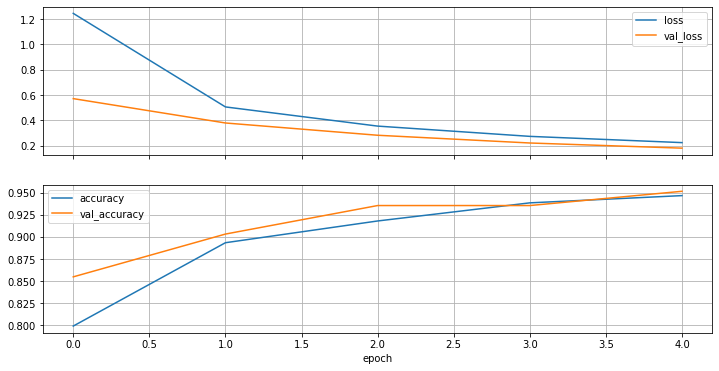

In [73]:
#строим кривые обучения
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6)) #создаем фигуру и оси для отрисовки 2 графиков
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0, grid=True) #рисуем значения потерь для обучающих и валидационных данных
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, grid=True) #рисуем значения точности для обучающих и валидационных данных

In [74]:
#сделаем предсказание для выведенного ранее изображения цифры 1
sample_index = 90 #номер случайного изображения (цифра 1)
img = np.asarray(digits.data[sample_index], dtype='float32') #представим изображение в виде массива numpy
img = img.reshape(-1,64) #представим изображение в формате, требуемом для подачи на вход сети
print('Распределение вероятностей: ', model.predict(img)) #выполним предсказание (первое - вероятность 0, второе - вероятность 1)
print('Это было изображение цифры: ', np.argmax(model.predict(img)))

1/1 [==============================] - 0s 58ms/step
Распределение вероятностей:  [[0.08268733 0.99981964]]
1/1 [==============================] - 0s 25ms/step
Это было изображение цифры:  1


In [75]:
#сделаем прогноз для всех тестовых данных и оценим его
y_pred = np.argmax(model.predict(X_test), axis=1) #прогнозные значения
print('*'*100,'Матрица ошибок', sep='\n')
print(confusion_matrix(y_test,y_pred)) #матрица ошибок (Истинно-положительные, ложно-положительные, ложно-отрицательные, истинно-отрицательные)
print('*'*100,'Отчет о классификации', sep='\n')
print(classification_report(y_test, y_pred)) #отчет о классификации (все метрики)

2/2 [==============================] - 0s 5ms/step
****************************************************************************************************
Матрица ошибок
[[32  1]
 [ 2 19]]
****************************************************************************************************
Отчет о классификации
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.95      0.90      0.93        21

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54



## Кейс №1

Вам необходимо исправить код таким образом, чтобы нейронная сеть могла обучаться всем 10 цифрам. А затем оценить обученную модель. Настраивая параметры обучения, постарайтесь добиться значений точности не менее **90%**.

Text(0.5, 1.0, 'image label: 3')

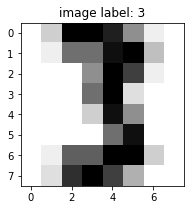

In [76]:
#выведем одно изображение для примера
sample_index1 = 63 #номер случайного изображения
plt.figure(figsize=(3, 3)) #размер фигуры для визуализации
plt.imshow(digits.images[sample_index1], cmap=plt.cm.gray_r, interpolation='nearest') #вывод изображения в ч/б формате
plt.title("image label: %d" % digits.target[sample_index1]) #подпись изображения с классом картинки

In [77]:
digits.target[63]

3

In [78]:
data1 = np.asarray(digits.data, dtype='float32') #преобразуем данные входа в массив numpy
target1 = np.asarray(digits.target, dtype='int32')

In [79]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1, target1, test_size=0.15, random_state=37) 
print('Количество объектов и признаков в обучающих данных: ', X_train1.shape) 
print('Количество меток в обучающих данных: ', y_train1.shape) 
print('Количество объектов и признаков в тестовых данных: ', X_test1.shape) 
print('Количество меток в тестовых данных: ', y_test1.shape) 

Количество объектов и признаков в обучающих данных:  (1527, 64)
Количество меток в обучающих данных:  (1527,)
Количество объектов и признаков в тестовых данных:  (270, 64)
Количество меток в тестовых данных:  (270,)


In [80]:
Y_train1 = to_categorical(y_train1) 
Y_train1[:5] 

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [81]:
#создаем нейронную сеть
input_dim1 = X_train1.shape[1] 
hidden_dim1 = 128 
output_dim1 = Y_train1.shape[1]

model1 = Sequential() 
model1.add(Dense(hidden_dim1, input_dim=input_dim1, activation="relu"))
model1.add(Dense(output_dim1, activation="softmax"))
model1.compile(optimizer=optimizers.Adam(learning_rate=0.0015), loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train1, Y_train1, validation_split=0.2, epochs = 10, batch_size=64)

Epoch 1/10
20/20 [==============================] - 1s 16ms/step - loss: 3.5717 - accuracy: 0.3423 - val_loss: 1.0009 - val_accuracy: 0.7157
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5422 - accuracy: 0.8288 - val_loss: 0.3634 - val_accuracy: 0.8889
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2779 - accuracy: 0.9189 - val_loss: 0.2660 - val_accuracy: 0.8987
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1961 - accuracy: 0.9451 - val_loss: 0.2099 - val_accuracy: 0.9314
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1511 - accuracy: 0.9615 - val_loss: 0.1789 - val_accuracy: 0.9542
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.1331 - accuracy: 0.9640 - val_loss: 0.1705 - val_accuracy: 0.9412
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.1029 - accuracy: 0.9754 - val_loss: 0.1372 - val_accuracy: 0.9641
Epoch 8/10
20/20 [=

In [82]:
history_df1 = pd.DataFrame(history1.history) #создаем датафрейм и записываем туда метрики из истории
history_df1["epoch"] = history1.epoch #создаем столбец с номерами эпох обучения (начинаем с 0)
history_df1 #выводим датафрейм

,loss,accuracy,val_loss,val_accuracy,epoch
0,3.571679,0.342342,1.000926,0.715686,0
1,0.542150,0.828829,0.363428,0.888889,1
2,0.277901,0.918919,0.265985,0.898693,2
3,0.196084,0.945127,0.209940,0.931373,3
4,0.151097,0.961507,0.178932,0.954248,4
5,0.133137,0.963964,0.170513,0.941176,5
6,0.102940,0.975430,0.137159,0.964052,6
7,0.087944,0.977887,0.131746,0.967320,7
8,0.064212,0.988534,0.113420,0.973856,8
9,0.060351,0.986896,0.112366,0.967320,9


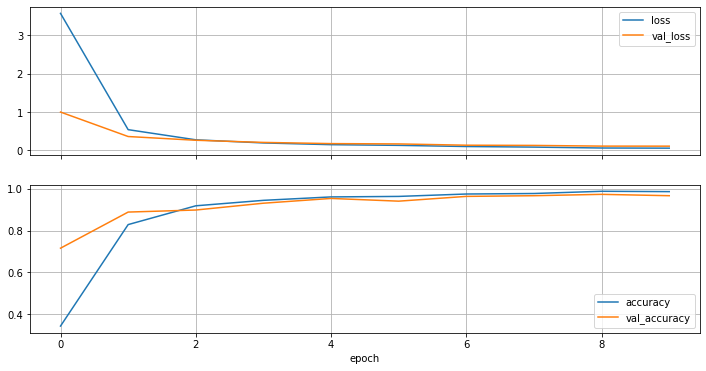

In [83]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6)) #создаем фигуру и оси для отрисовки 2 графиков
history_df1.plot(x="epoch", y=["loss", "val_loss"], ax=ax0, grid=True) #рисуем значения потерь для обучающих и валидационных данных
history_df1.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, grid=True)

In [84]:
sample_index2 = 63 
img = np.asarray(digits.data[sample_index2], dtype='float32') 
img = img.reshape(-1,64) 
print('Распределение вероятностей: ', model1.predict(img)) 
print('Это было изображение цифры: ', np.argmax(model1.predict(img)))

1/1 [==============================] - 0s 60ms/step
Распределение вероятностей:  [[3.7508546e-08 6.4077103e-05 7.5813371e-04 9.9917310e-01 5.1371661e-08
  2.4109227e-07 3.1764320e-11 9.1701327e-07 3.3191805e-06 6.8710499e-08]]
1/1 [==============================] - 0s 25ms/step
Это было изображение цифры:  3


In [85]:
y_pred1 = np.argmax(model1.predict(X_test1), axis=1) 
print('*'*100,'Матрица ошибок', sep='\n')
print(confusion_matrix(y_test1,y_pred1)) 
print('*'*100,'Отчет о классификации', sep='\n')
print(classification_report(y_test1, y_pred1))

9/9 [==============================] - 0s 3ms/step
****************************************************************************************************
Матрица ошибок
[[26  0  0  0  0  1  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  2  0  0]
 [ 0  1  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0]
 [ 0  1  0  0  0  1  0  0 32  1]
 [ 0  0  0  0  0  0  0  0  0 24]]
****************************************************************************************************
Отчет о классификации
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        17
           4       1.00      0.93      0.96        28
           5       0.94      0.94      0.94        31
